# Problema 5 (Tema 2). Interpolación en una imagen usando funciones *spline*

Consideremos la imagen `UCA-CASEM.png` (que puede descargarse de [esta página web](https://raw.githubusercontent.com/rrgalvan/python-mnii/master/2-interpolacion/UCA-CASEM.png)).

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de $13$ nodos, $x_i$, equiespaciados en $[a,b]=[0,600]$ ($600$ es el número de pixels horizontales de la imagen). Intentar encontrar una lista de valores, $y_i$, definidos adecuadamente para que los puntos esten (aproximadamente) situados en el "tejado" del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo del "tejado" 

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `interp1d` (contenida en `scipy.interpolate`), con la opción `kind="cubic"`

5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [1]:
from __future__ import division, print_function # Sólo si se usa Python 2.x
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

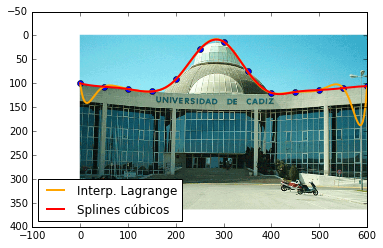

In [2]:
# 1. Mostramos la imagen
imagen = plt.imread('UCA-CASEM.png') 
plt.imshow(imagen)

# 2. Definimos los puntos de interpolación y los dibujamos
xlist = np.linspace(0, 600, 13)
ylist = [100, 107, 112, 117, 92, 29, 13, 75, 120, 118, 114, 110, 106]
plt.plot(xlist, ylist, 'o', c='blue')

# 3. Interpolación de Lagrange
from scipy.interpolate import lagrange
p_lagrange = lagrange(xlist, ylist)
xx = np.linspace(0,600,200)
plt.plot(xx, p_lagrange(xx), c='orange', lw=2, label='Interp. Lagrange')

# 4. Interpolación mediante splines cúbicos
from scipy.interpolate import interp1d
s_cubico = interp1d(xlist, ylist, kind='cubic')
plt.plot(xx, s_cubico(xx), c='red', lw=2, label=u'Splines cúbicos')

plt.legend(loc='lower left')

Como se puede apreciar, la interpolación de Lagrange en puntos equidistribuidos presenta oscilaciones. Se trata del fenómeno de Runge, que consecuencia de que no está garantizado que el error de interpolación converja a cero cuando aumentamos el número de puntos.

Sin embargo, en el caso de la interpolación a trozos, podemos garantizar la convergencia a cero del interpolante cuando el número de puntos tiende a infinito.